In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(1, '/viscam/projects/audio_nerf/transfer/audio_nerf/src')
import preprocess
import numpy as np
from IPython.display import Audio
import matplotlib.pyplot as plt

In [2]:
data = np.load("/viscam/projects/audio_nerf/transfer/audio_nerf/data/processed_6s/reference.npy", mmap_mode='r')

In [3]:
Audio(data[1002], rate=44100)

# Reconstruction Test - Griffin Lim

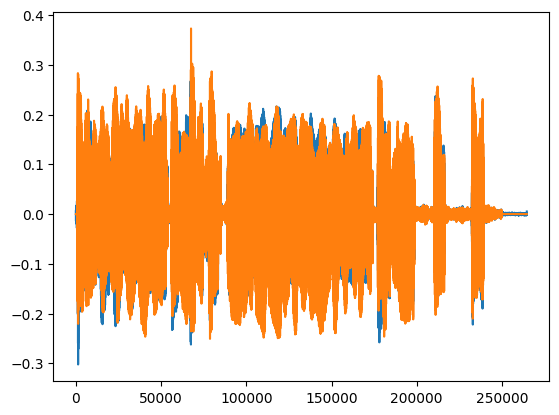

In [4]:
reconstructed = preprocess.waveform_from_spectrogram(preprocess.spectrogram_from_waveform(data[1002]))
display(Audio(reconstructed, rate=44100))
plt.plot(reconstructed)
plt.plot(data[1002])

# Reconstruction From Images Test

<PIL.Image.Image image mode=RGB size=601x512 at 0x7F1F483884C0>


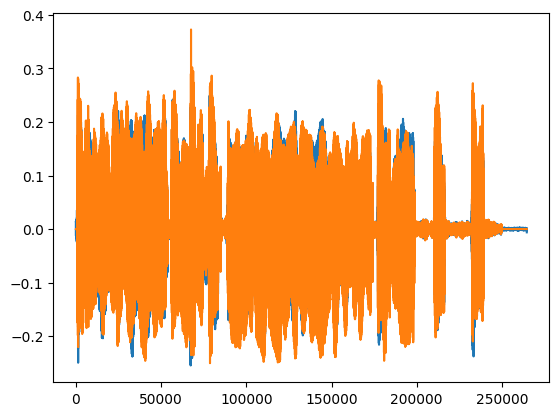

In [5]:
img1, max_value_1 = preprocess.image_from_spectrogram(preprocess.spectrogram_from_waveform(data[1002]))
reconstructed_spectrogram = preprocess.spectrogram_from_image(img1, max_value_1)
reconstructed_waveform = preprocess.waveform_from_spectrogram(reconstructed_spectrogram)
display(Audio(reconstructed_waveform, rate=44100))
plt.plot(reconstructed_waveform)
plt.plot(data[1002])

# Reconstruction from VAE Test

In [6]:
import os
#os.environ['HF_HOME'] = '/path/to/new/cache/directory'
from diffusers import DiffusionPipeline
sys.path.insert(1, '/viscam/projects/audio_nerf/transfer/audio_nerf/riffusion-inference')
from riffusion.spectrogram_image_converter import SpectrogramImageConverter
from riffusion.spectrogram_params import SpectrogramParams
pipe = DiffusionPipeline.from_pretrained("riffusion/riffusion-model-v1")
pipe = pipe.to("cuda")

/viscam/u/ycda/miniconda3/envs/devoc/lib/python3.9/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

/viscam/u/ycda/miniconda3/envs/devoc/lib/python3.9/site-packages/torch/_utils.py:776: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()
/viscam/u/ycda/miniconda3/envs/devoc/lib/python3.9/site-packages/diffusers/pipelines/stable_diffusion/pipeline_stable_diffusion.py:151: FutureWarning: The configuration file of the unet has set the default `sample_size` to smaller than 64 which seems highly unlikely. If your checkpoint is a fine-tuned version of any of the following: 
- CompVis/stable-diffusion-v1-4 
- CompVis/stable-diffusion-v1-3 
- CompVis/stable-diffusion-v1-2 
- CompVis/stable-diffusion-v1-1 
- runwayml/stable-diffusion-v1-5 
- runwayml/stable-diffusion-inpainting 
 you should change 'sample_size' to 64 i

In [7]:
input_to_vae, max_value = preprocess.waveform_to_vae_input(data[1006])
encoded = pipe.vae.encode(input_to_vae.to("cuda"))
mean = encoded.latent_dist.mean
logvar = encoded.latent_dist.logvar

In [8]:
decoder_out = pipe.vae.decode(mean).sample

(1, 512, 576, 3)
<PIL.Image.Image image mode=RGB size=576x512 at 0x7F1F1EF50160>


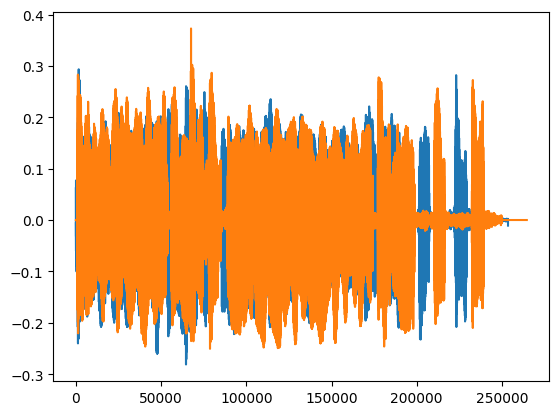

In [9]:
vae_reconstruction = preprocess.vae_output_to_waveform(decoder_out, pipe, max_value)
display(Audio(vae_reconstruction, rate=44100))
plt.plot(vae_reconstruction)
plt.plot(data[1002])